# **Emmanuel NYANDU KAGARABI**

# **Applied Machine Learning at scale : Practical 1**

# 0. Useful libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 1.  Download the MovieLens 25M data set and understand its README

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#We use the read_csv to load the data
df = pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/ml-25m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,25000095.0,8.118928e+04,4.679172e+04,1.0,4.051000e+04,8.091400e+04,1.215570e+05,1.625410e+05
movieId,25000095.0,2.138798e+04,3.919886e+04,1.0,1.196000e+03,2.947000e+03,8.623000e+03,2.091710e+05
rating,25000095.0,3.533854e+00,1.060744e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,25000095.0,1.215601e+09,2.268758e+08,789652009.0,1.011747e+09,1.198868e+09,1.447205e+09,1.574328e+09


In [6]:
# Convert columns to NumPy arrays
user_id = df['userId'].to_numpy(dtype=int)
movie_id = df['movieId'].to_numpy(dtype=int)
ratings = df['rating'].to_numpy(dtype=float)
# Reassign arrays to DataFrame with original column names
df = pd.DataFrame({'userId': user_id, 'movieId': movie_id, 'rating': ratings})
df.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


# 2. Write a data structure that indexes the data (a) by user and (b) by movie

In [7]:
#@title A. Data structures
#1. Data strucures
user_to_index ={} # ex {"u1":0,...,"u100": 99}
movie_to_index = {} # ex {"m1":0,...,"m50": 49}
list_to_user = [] # ex ["u1",...,"u100"]
list_to_movie = [] # ex ["m1",...,"m50"]
data_by_movie =  []# ex[[(u1,r10),...,(u100,r1100)],[...],[]]
data_by_user =  []# ex[[(m1,r10),...,(m50,r1100)],[...],[]]

#2. Let's fill the data structure given above
for user,movie,rating in zip(user_id,movie_id,ratings):
    # Users
    if user not in user_to_index:
        index = len(list_to_user)
        user_to_index[user] = index
        list_to_user.append(user)
        data_by_user.append([])
    else:
        index = user_to_index[user]

    # Movies
    if movie not in movie_to_index:
        index_movie = len(list_to_movie)
        movie_to_index[movie] = index_movie
        list_to_movie.append(movie)
        data_by_movie.append([])
    else:
        index_movie = movie_to_index[movie]

    # Data
    data_by_movie[index_movie].append((index, rating)) # or (user,rating)
    data_by_user[index].append((index_movie, rating)) # or (movie,rating)

In [8]:
# Let's consider all users vs sum of rating per user
users_index = []
counts = []
number_of_movies_per_user = []
for idx, user_x in enumerate(data_by_user):
    m = len(user_x)
    count = 0
    users_index.append(idx)
    number_of_movies_per_user.append(m)
    for i in range(m):
        count += user_x[i][1]
    counts.append(count)

In [9]:
# Let's consider all movies vs sum of rating per movie
movies_index = []
counts_movies = []
number_of_users_per_movie = []
for idm, movie_x in enumerate(data_by_movie):
    n = len(movie_x)
    count = 0
    movies_index.append(idm)
    number_of_users_per_movie.append(n)
    for j in range(n):
        count += movie_x[j][1]
    counts_movies.append(count)

# 3. Plot rating distributions of data

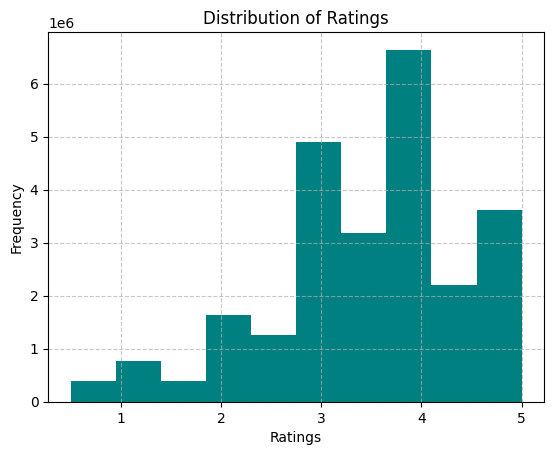

In [10]:
#@title Plotting the distributions of ratings
plt.hist(ratings, color='teal', alpha=1.0, density=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/Figures/Rating_distribution_p1.pdf', format='pdf')
plt.show()

# 4. Are there power laws in the data? Is it scale-free? (Note that each user rated at least 20 movies. Truncation will skew the power law that you’d expect…)

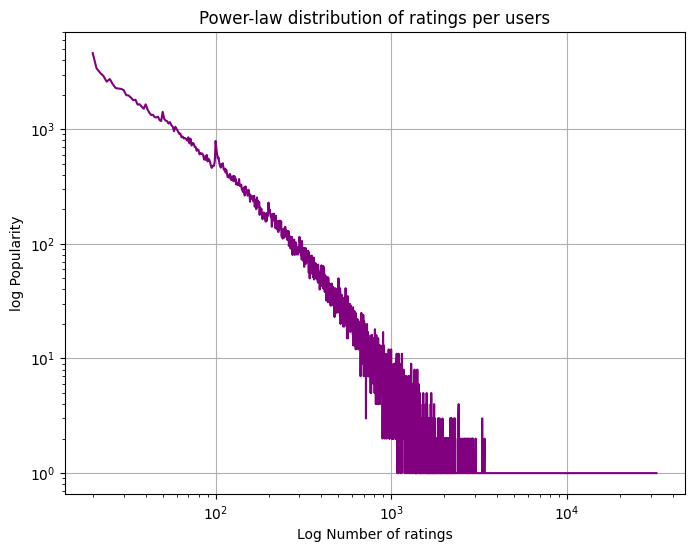

In [11]:
#Power law 1 :
counter = Counter(number_of_movies_per_user)
values, frequencies = zip(*sorted(counter.items()))
plt.figure(figsize=(8, 6))
plt.plot(values,frequencies, color = 'purple', linestyle = '-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log Number of ratings')
plt.ylabel('log Popularity')
plt.title('Power-law distribution of ratings per users')
plt.grid(True)
plt.show()


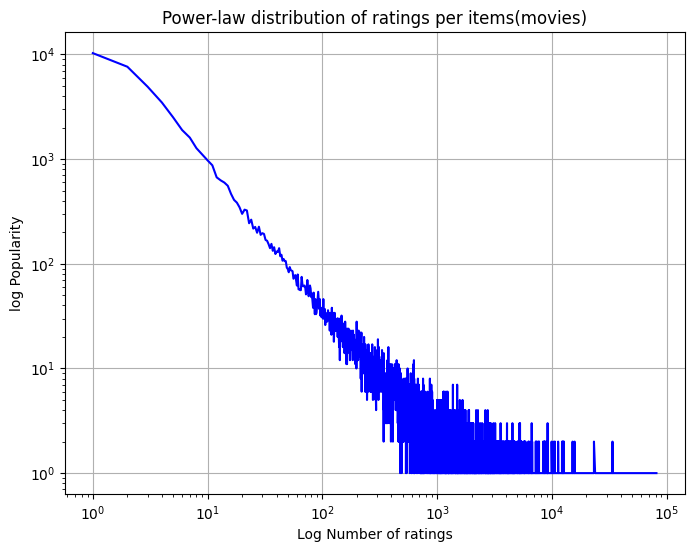

In [12]:
#Power law 2 :
counter = Counter(number_of_users_per_movie)
values, frequencies = zip(*sorted(counter.items()))
plt.figure(figsize=(8, 6))
plt.plot(values, frequencies, color='blue', linestyle='-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log Number of ratings')
plt.ylabel('log Popularity')
plt.title('Power-law distribution of ratings per items(movies)')
plt.grid(True)
plt.show()


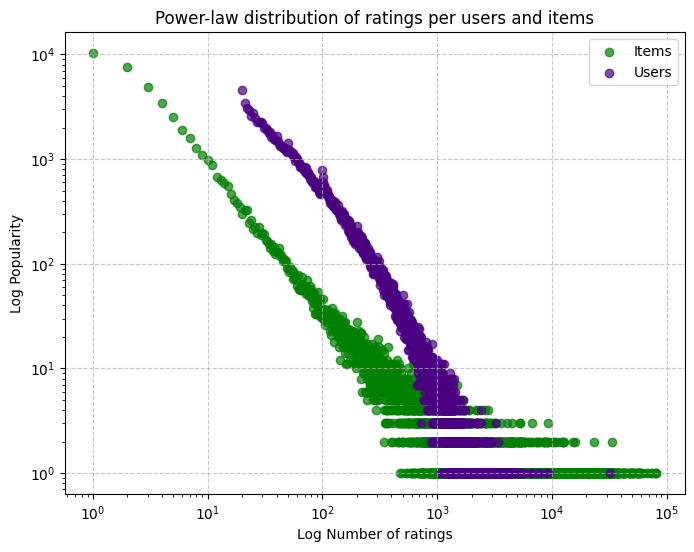

In [13]:
# Power law 1
counter_users = Counter(number_of_movies_per_user)
values_users, frequencies_users = zip(*sorted(counter_users.items()))

# Power law 2
counter_movies = Counter(number_of_users_per_movie)
values_movies, frequencies_movies = zip(*sorted(counter_movies.items()))

plt.figure(figsize=(8, 6))

# Plot both distributions on one subplot
plt.scatter(values_movies, frequencies_movies, color='green', linestyle='-',alpha=0.7, label='Items')
plt.scatter(values_users, frequencies_users, color='indigo', linestyle='-',alpha=0.7, label='Users')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log Number of ratings')
plt.ylabel('Log Popularity')
plt.title('Power-law distribution of ratings per users and items')
plt.legend()

plt.grid(linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/Figures/Power_law_distributions_p1.pdf', format='pdf')

plt.show()